In [36]:
import os
from tensorflow.keras.models import load_model
import numpy as np
import cv2
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
# from matplotlib.pyplot import figure

# figure(figsize=(8, 6), dpi=80)

%matplotlib inline

model_name= "v4_epoch-10"
model = load_model(model_name+"/model.h5")

folder_path=r"C:\Users\Raghu\Desktop\Gestures\Confusion Matrix\all"

real=[]
predicted=[]

for i in os.listdir(folder_path):

    img_path=os.path.join(folder_path, i)

    t=cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
    t=cv2.resize(t, (128, 128))

    preds = model.predict(t.reshape(1, 128, 128, 1))
    preds = np.argmax(preds, axis=1)
    predicted.append(preds[0])

    img_number=int(os.path.splitext(os.path.basename(img_path))[0])

    if 0 <= img_number <= 11:
        real.append(0)
    elif 633 <= img_number <= 658:
        real.append(1)
    elif 12 <= img_number <= 35:
        real.append(2)
    elif 36 <= img_number <= 57:
        real.append(3)
    elif 58 <= img_number <= 80:
        real.append(4)
    elif 81 <= img_number <= 102:
        real.append(5)
    elif 103 <= img_number <= 127:
        real.append(6)
    elif 128 <= img_number <= 149:
        real.append(7)
    elif 150 <= img_number <= 172:
        real.append(8)
    elif 173 <= img_number <= 198:
        real.append(9)
    elif 199 <= img_number <= 223:
        real.append(10)
    elif 224 <= img_number <= 248:
        real.append(11)
    elif 249 <= img_number <= 272:
        real.append(12)
    elif 273 <= img_number <= 298:
        real.append(13)
    elif 299 <= img_number <= 327:
        real.append(14)
    elif 328 <= img_number <= 355:
        real.append(15)
    elif 356 <= img_number <= 380:
        real.append(16)
    elif 381 <= img_number <= 401:
        real.append(17)
    elif 402 <= img_number <= 428:
        real.append(18)
    elif 429 <= img_number <= 455:
        real.append(19)
    elif 456 <= img_number <= 480:
        real.append(20)
    elif 481 <= img_number <= 505:
        real.append(21)
    elif 506 <= img_number <= 531:
        real.append(22)
    elif 532 <= img_number <= 557:
        real.append(23)
    elif 558 <= img_number <= 583:
        real.append(24)
    elif 584 <= img_number <= 608:
        real.append(25)
    elif 609 <= img_number <= 632:
        real.append(26)
    else:
        real.append(-1)


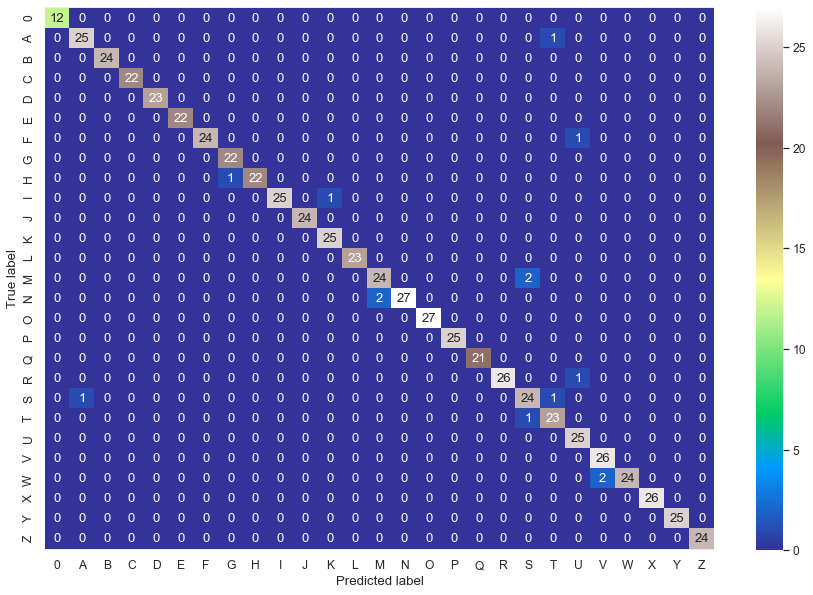

In [37]:
cmap="terrain"

cm_plot_labels = ['0','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

cm = confusion_matrix(y_true=real, y_pred=predicted)

df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
sn.set(font_scale=1.1) # for label size
plt.figure(figsize = (15,10))
s=sn.heatmap(df_cm, annot=True,cmap=cmap) # font size
bottom,top=s.get_ylim()
s.set_ylim(bottom+0.6,top-0.6)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('matrix4.png')
plt.show()